מגישים:
ירדן בן טל, ת.ז: 308057785,
דניאל כהן, ת.ז: 211377932,
יוסף כהן, ת.ז: 208259002

### 1. Imports

In [44]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

Imports of the necessary library's

### 2. Load digits dataset and extract features


In [45]:
digits = load_digits()
x, y = digits.data, digits.target

# Choose only three classes: 0, 1, 2
mask = np.isin(y, [0,1,2])
x, y = x[mask], y[mask]

Load the digits dataset and extract the feature matrix x and label vector y. Then, filter the dataset to retain only the samples corresponding to digits 0, 1, and 2, removing all other classes (3–9).

### 3. Train-test split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0 )

# PCA to reduce to 2D
pca = PCA(n_components=2, random_state=0)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

We split the data into 70% for training and 30% for testing using train_test_split. The stratify=y part makes sure we keep the same number of each digit (0, 1, 2) in both sets. We also set random_state=0 so that the split is the same every time we run the code — this helps us know that any changes in results are from the model, not because of different random splits.

After that, we use PCA to reduce the data from 64 dimensions down to 2, so we can easily show it on a 2D graph.

### 4. Run KMeans on PCA-transformed data


In [47]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x_train_pca)

# Print the clustering result
print(np.unique(kmeans.labels_))
print("Cluster centers:\n", kmeans.cluster_centers_)

[0 1 2]
Cluster centers:
 [[ 13.88929669  12.02002704]
 [-24.26368922   2.51921587]
 [ 11.60858026 -18.00203432]]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


The first line creates a KMeans clustering model.
* n_clusters=3 tells it to group the data into 3 clusters — one for each digit (0, 1, 2).

* random_state=0 ensures that the initial placement of the cluster centers is the same every time you run the code, so your results are consistent.

The second line trains the KMeans model using the PCA-transformed training data (x_train_pca).
The algorithm tries to find 3 groups in the data by adjusting the cluster centers until the grouping makes sense (i.e., points are close to their center).


### 5. Plot the KMeans clusters in the 2D space


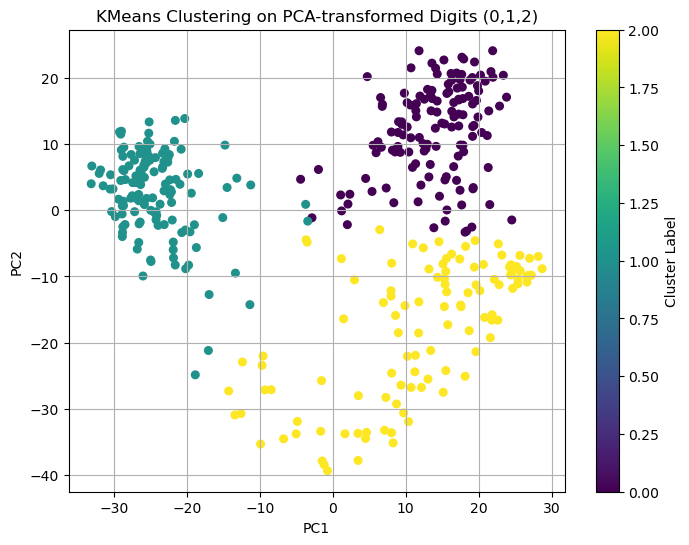

KMeans clustering accuracy (after mapping): 0.90
Confusion Matrix:
[[124   0   0]
 [  2 102  23]
 [  4   7 113]]


In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=30)
plt.title("KMeans Clustering on PCA-transformed Digits (0,1,2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()

# Build the confusion matrix: rows = true labels, columns = cluster labels
conf_mat = confusion_matrix(y_train, kmeans.labels_)

# Map each cluster to the most common true label
# This gives us: label_map[cluster] = predicted_digit
label_map = np.argmax(conf_mat, axis=0)

# Use the label map to convert cluster IDs to predicted digits
predicted_digits = label_map[kmeans.labels_]

# Accuracy and confusion
acc = accuracy_score(y_train, predicted_digits)
print(f"KMeans clustering accuracy (after mapping): {acc:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_train, predicted_digits))

We first draw a 2D scatter plot to show the clusters found by KMeans on the PCA-transformed training data. Each point is colored based on the cluster it was assigned to.

Then, we compare the clusters to the original digit labels (0, 1, 2) using a confusion matrix. Since KMeans does not know the true labels, we create a mapping from each cluster ID to the most common digit it represents.

After applying this mapping, we calculate the accuracy and print a new confusion matrix to see how well the clustering matches the true labels.

### 6. Elbow method


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

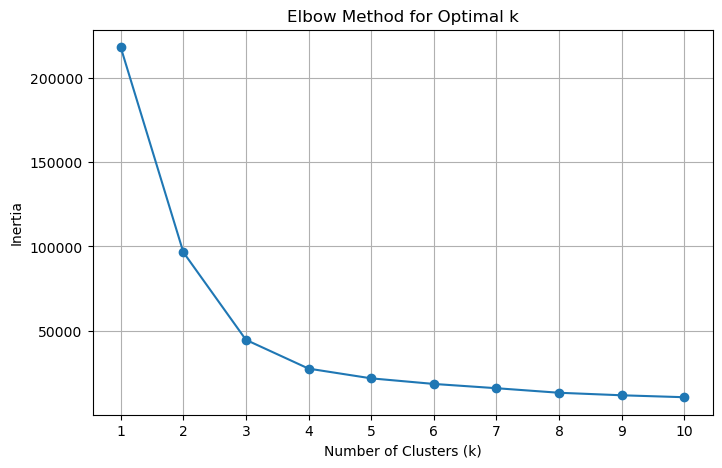

In [49]:
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x_train_pca)
    inertias.append(kmeans.inertia_)  # Inertia = sum of squared distances to the closest cluster center

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)
plt.show()


We use the elbow method to help decide how many clusters to use for KMeans. (The elbow method is a simple way to choose the best number of clusters (k) when using KMeans.)

We run KMeans for different values of k (from 1 to 10), and each time we store the inertia, which measures how tightly the data points are grouped around their cluster centers.

Then we plot k versus the inertia. The "elbow point" is where the curve starts to level off — this is usually the best choice for k, since adding more clusters after that doesn’t improve the grouping much.

## creating the GMM functions for part 7 and 8

In [50]:
def initialize_gmm(X, n_components, covariance_type='full', random_state=0):
    rng = np.random.RandomState(random_state)  # Create a random number generator for reproducibility
    n_samples, n_features = X.shape

    # Randomly select initial means from the data
    means = X[rng.choice(n_samples, n_components, replace=False)]

    # Start with equal weights for each cluster
    weights = np.ones(n_components) / n_components

    if covariance_type == 'full':
        # Create full covariance matrices for each component
        # Add 1e-6 to the diagonal to prevent singular matrix errors during inversion
        covariances = np.array([
            np.cov(X, rowvar=False) + 1e-6 * np.eye(n_features)
            for _ in range(n_components)
        ])
    elif covariance_type == 'diag':
        # Create diagonal covariance matrices using the variance of each feature
        diag = np.var(X, axis=0) + 1e-6  # 1e-6 added to prevent divide-by-zero or singularity
        covariances = np.array([np.diag(diag) for _ in range(n_components)])
    else:
        raise ValueError("Unsupported covariance_type")  # Handle unexpected input values

    return means, covariances, weights

This function prepares everything needed to start the EM algorithm for GMM. It randomly selects initial cluster means, gives equal weights to each cluster, and builds the starting covariance matrices.

It supports both 'full' (full matrix) and 'diag' (diagonal only) types of covariance.

A small value (1e-6) is added to each covariance matrix to avoid numerical problems like matrix inversion errors.

In [51]:
def mvn_pdf(x, mu, cov):
    d = mu.shape[0]
    det = np.linalg.det(cov) # |Σ|
    inv = np.linalg.inv(cov) # Σ⁻¹
    norm_const = 1.0 / np.sqrt((2 * np.pi) ** d * det)
    diff = x - mu
    exponent = -0.5 * diff.T.dot(inv).dot(diff) # (x-μ)ᵀΣ⁻¹(x-μ) * (-0.5)
    return norm_const * np.exp(exponent)

### Multivariate Normal Distribution PDF

The probability density function of a \(d\)-dimensional multivariate normal distribution is:

$$
\Huge
\displaystyle
\frac{1}{\sqrt{(2\pi)^d |\Sigma|}} \cdot
e^{-\frac{1}{2}(x - \mu)^{\mathrm{T}} \Sigma^{-1} (x - \mu)}
$$




In [52]:
def e_step(X, means, covariances, weights):
    n_samples = X.shape[0] # number of data points
    n_components = means.shape[0] # number of clusters (one row of 'means' per cluster)

    # Initialize responsibility matrix to zeros
    resp = np.zeros((n_samples, n_components))

    # For each cluster k, compute the “unnormalized” responsibility for each sample
    # by evaluating the Gaussian PDF at x_i for cluster k and multiplying by w_k.
    for k in range(n_components):
        mu_k = means[k]
        cov_k = covariances[k]
        w_k = weights[k]

        # Loop over each sample because mvn_pdf computes one point at a time
        for i in range(n_samples):
            resp[i, k] = w_k * mvn_pdf(X[i], mu_k, cov_k)

    # Sum over clusters for each sample (for normalization and log likelihood)
    total_resp = resp.sum(axis=1, keepdims=True)           # shape (n_samples, 1)
    log_likelihood = np.sum(np.log(total_resp))            # Σ_i log( Σ_k [ w_k · N(...) ] )

    # Divide each row by its sum to get true responsibilities
    resp /= total_resp                                     # broadcasting divides each row by that row’s total

    return resp, log_likelihood


This function performs the E-step of the EM algorithm. For each data point and each cluster, it calculates how likely the point is to belong to that cluster (called responsibilities).

It uses the Gaussian formula to calculate these probabilities based on the current means, covariances, and weights.

It also calculates the total log-likelihood, which helps track how well the model fits the data during training.

In [53]:
def m_step(X, resp, covariance_type):
    # Get number of samples (n) and features (d)
    n_samples, n_features = X.shape

    # Get number of clusters (K) from responsibility matrix
    n_components = resp.shape[1]

    # weights[k] = total responsibility assigned to cluster k
    weights = resp.sum(axis=0)

    # Normalize weights to get mixing coefficients (they should sum to 1)
    normalized_weights = weights / n_samples

    # Compute the new means: weighted average of the points for each cluster
    # shape: (n_components × n_features)
    means = (resp.T @ X) / weights[:, None]

    # Compute the new covariances
    covariances = []
    for k in range(n_components):
        diff = X - means[k]  # (n_samples × n_features): how far each point is from mean_k

        if covariance_type == 'full':
            # Full covariance: weighted outer product of the differences
            cov = (resp[:, k][:, None] * diff).T @ diff / weights[k]
            cov += 1e-6 * np.eye(n_features)  # Add small value to diagonal for numerical stability

        elif covariance_type == 'diag':
            # Diagonal covariance: weighted average of squared differences
            var_diag = np.average(diff ** 2, axis=0, weights=resp[:, k])
            cov = np.diag(var_diag + 1e-6)  # Build diagonal matrix + small stability term

        covariances.append(cov)  # Store for cluster k

    # Return updated parameters for next EM step
    return means, np.array(covariances), normalized_weights

This function performs the M-step of the EM algorithm.
It updates the means, covariances, and weights of each cluster using the current responsibility values.
It supports both 'full' (full covariance matrix) and 'diag' (diagonal matrix only).
We also add a small value 1e-6 to the diagonal of the covariance to make sure it stays stable and invertible.

In [54]:
def run_gmm(X, n_components, covariance_type='full', max_iter=100, tol=1e-6, random_state=0, return_log=False):
    # Initialize cluster means, covariances, and weights
    means, covariances, weights = initialize_gmm(X, n_components, covariance_type, random_state)

    # Store log-likelihoods at each EM step (for convergence tracking or plotting)
    log_likelihoods = []

    for _ in range(max_iter):
        # E-step: compute responsibilities and log-likelihood
        resp, ll = e_step(X, means, covariances, weights)

        # M-step: update parameters based on responsibilities
        means, covariances, weights = m_step(X, resp, covariance_type)

        # Track the total log-likelihood
        log_likelihoods.append(ll)

        # Check for convergence (if change in log-likelihood is very small)
        if len(log_likelihoods) > 1 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            break

    # After final E-step, assign each point to the cluster with highest responsibility
    labels = np.argmax(resp, axis=1)

    # Return both labels and log-likelihood history if requested
    return (labels, log_likelihoods) if return_log else labels

This function runs the full EM algorithm for GMM. It starts by initializing the cluster parameters, then loops through E-step and M-step updates.

The loop stops either when it reaches the maximum number of iterations, or when the change in log-likelihood is smaller than a given threshold (tol).

In the end, it returns the predicted cluster labels, and if requested, also returns the log-likelihood values across iterations to track convergence.

### 7. Try both covariance types


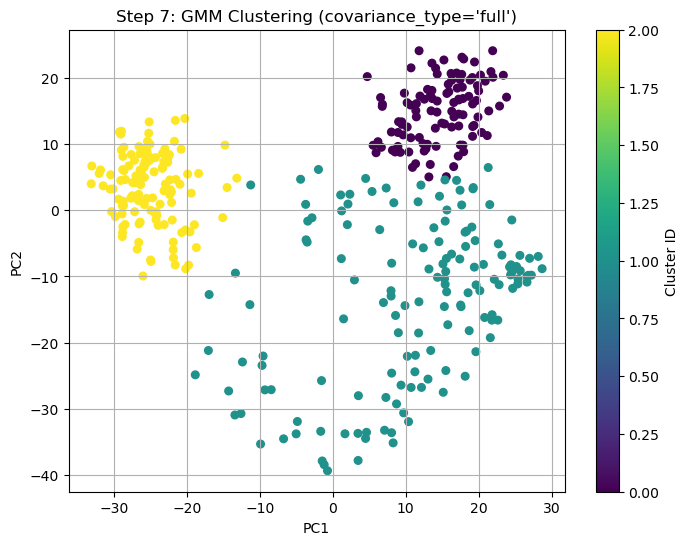

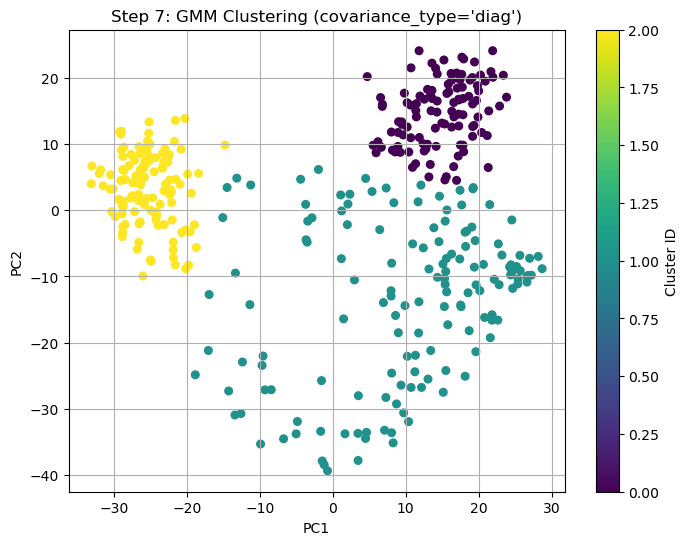

In [55]:
# Loop over both covariance types: 'full' (full matrix) and 'diag' (diagonal only)
# This lets us compare how different GMM configurations affect the clustering
for cov_type in ['full', 'diag']:
    # Run the custom GMM algorithm with the current covariance type
    # n_components=3 because we are clustering digits 0, 1, and 2
    labels = run_gmm(x_train_pca, n_components=3, covariance_type=cov_type, max_iter=100)

    plt.figure(figsize=(8, 6))
    plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=labels, cmap='viridis', s=30)
    plt.title(f"Step 7: GMM Clustering (covariance_type='{cov_type}')")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.colorbar(label="Cluster ID")
    plt.grid(True)
    plt.show()

We test our self-built GMM implementation using both 'full' and 'diag' covariance types.

For each type, we run the GMM on the PCA-transformed data (x_train_pca) and get predicted cluster labels.

Then we create a scatter plot showing how the model groups the data in 2D space. Each point is colored by its assigned cluster, and we compare how the clustering changes depending on the covariance type used.

### Step 8: Track how log-likelihood increases over EM iterations


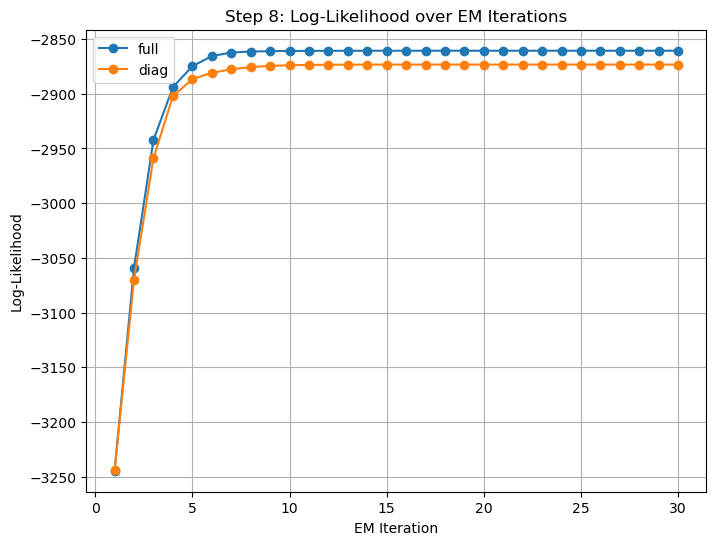

In [56]:
plt.figure(figsize=(8, 6))

# Try both covariance types
for cov_type in ['full', 'diag']:
    # Run GMM with logging enabled and a fixed number of iterations
    # We only care about the log-likelihood trend here, not full convergence
    _, ll = run_gmm(x_train_pca, n_components=3,
                    covariance_type=cov_type,
                    max_iter=30,          # Limit to 30 steps for plotting
                    return_log=True)      # Get log-likelihoods

    # Plot log-likelihood per iteration
    plt.plot(range(1, len(ll) + 1), ll, marker='o', label=f"{cov_type}")

# plot setup
plt.title("Step 8: Log-Likelihood over EM Iterations")
plt.xlabel("EM Iteration")
plt.ylabel("Log-Likelihood")
plt.legend()
plt.grid(True)
plt.show()

In this step, we track how the log-likelihood changes during each iteration of the EM algorithm for both 'full' and 'diag' covariance types.

The log-likelihood should increase over time as the algorithm improves the fit.
We limit the number of iterations to 30 so the plot stays readable and focuses on the learning trend rather than full convergence.

| Step | Purpose                         | Iterations Used | Reason for This Choice                                   |
|------|----------------------------------|------------------|-----------------------------------------------------------|
| 7    | Show final clustering result     | `max_iter=100`   | Allow enough steps for convergence and accurate clusters |
| 8    | Plot log-likelihood progression  | `max_iter=30`    | Short and clear plot to visualize improvement over EM steps |

Step 7: Visual Clustering (max_iter=100)
Goal: Let the algorithm fully converge and show the final clusters.

* We use a larger number of iterations (e.g., 100) to give the EM algorithm time to reach a stable solution.

* This ensures the clusters are as accurate and refined as possible.

* Even if convergence happens earlier (before 100 steps), the loop will stop automatically due to the tolerance (tol) check.

✅ So here, we prioritize final clustering quality.

Step 8: Log-Likelihood Tracking (max_iter=30)
Goal: Track how the log-likelihood improves over time.

* We want to plot how the algorithm progresses through its iterations.

* Using a fixed number like 30 steps makes the plot clear and not too long.

* We’re not trying to reach convergence — we just want to visualize the improvement trend during EM.

✅ So here, we prioritize showing the learning process.
